In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [4]:
print("="*80)
print("TASK 1: LOAD AND INSPECT DATASET")
print("="*80)

TASK 1: LOAD AND INSPECT DATASET


In [5]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [6]:
print(df.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [9]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)


reviews_per_month    10052
last_review          10052
host_name               21
name                    16
dtype: int64


In [10]:
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

last_review          20.558339
reviews_per_month    20.558339
host_name             0.042949
name                  0.032723
dtype: float64


In [11]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [12]:
if 'last_review' in df.columns:
    df = df.drop('last_review', axis=1)
    print("Column 'last_review' dropped successfully")
else:
    print("Column 'last_review' not found in dataset")

Column 'last_review' dropped successfully


In [13]:
remaining_missing = df.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
if len(remaining_missing) > 0:
    print(remaining_missing)
else:
    print("No missing values remaining!")

name         16
host_name    21
dtype: int64


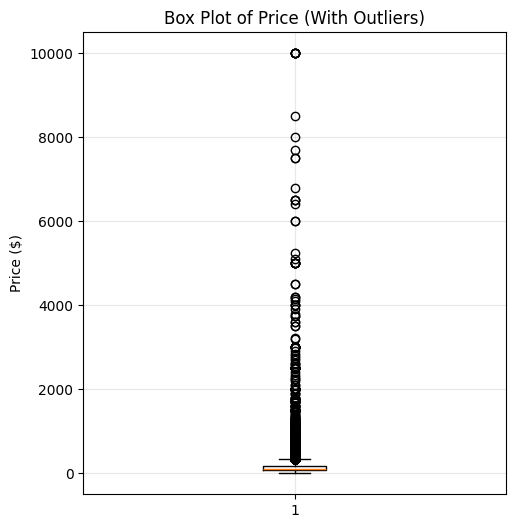

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['price'], vert=True)
plt.ylabel('Price ($)')
plt.title('Box Plot of Price (With Outliers)')
plt.grid(True, alpha=0.3)

# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


Outlier Boundaries:
Lower Bound: $-90.00
Upper Bound: $334.00

Number of outliers detected: 2972 (6.08% of data)
Original dataset size: 48895 rows
Cleaned dataset size: 45923 rows
Rows removed: 2972

--- Box plot saved as 'price_outliers_comparison.png' ---


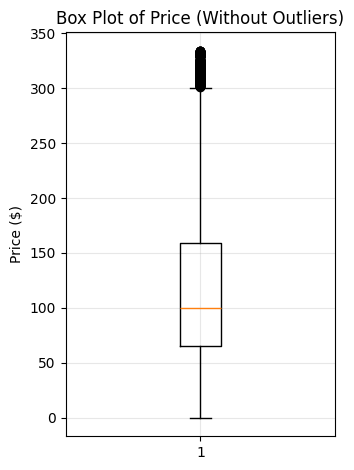


--- Price Column Statistics (After Outlier Removal) ---
count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64
--- Histogram saved as 'price_distribution_comparison.png' ---


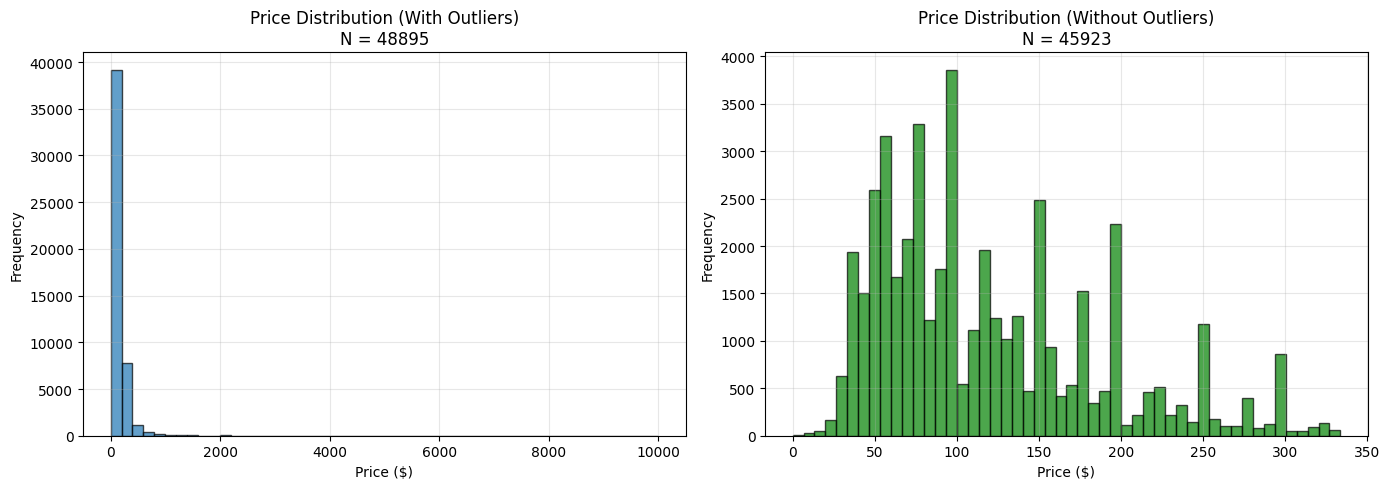

In [15]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier Boundaries:")
print(f"Lower Bound: ${lower_bound:.2f}")
print(f"Upper Bound: ${upper_bound:.2f}")

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"\nNumber of outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.2f}% of data)")

# Create cleaned DataFrame without outliers
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()
print(f"Original dataset size: {len(df)} rows")
print(f"Cleaned dataset size: {len(df_cleaned)} rows")
print(f"Rows removed: {len(df) - len(df_cleaned)}")

# Visualize cleaned price distribution
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['price'], vert=True)
plt.ylabel('Price ($)')
plt.title('Box Plot of Price (Without Outliers)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('price_outliers_comparison.png', dpi=300, bbox_inches='tight')
print("\n--- Box plot saved as 'price_outliers_comparison.png' ---")
plt.show()

# Display statistics after outlier removal
print("\n--- Price Column Statistics (After Outlier Removal) ---")
print(df_cleaned['price'].describe())

# Histogram comparison
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title(f'Price Distribution (With Outliers)\nN = {len(df)}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df_cleaned['price'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title(f'Price Distribution (Without Outliers)\nN = {len(df_cleaned)}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('price_distribution_comparison.png', dpi=300, bbox_inches='tight')
print("--- Histogram saved as 'price_distribution_comparison.png' ---")
plt.show()




In [16]:

print("\n--- Current Text Data Issues ---")
print("\nSample 'name' column entries (first 10):")
print(df_cleaned['name'].head(10).tolist())

print("\nSample 'host_name' column entries (first 10):")
print(df_cleaned['host_name'].head(10).tolist())


--- Current Text Data Issues ---

Sample 'name' column entries (first 10):
['Clean & quiet apt home by the park', 'Skylit Midtown Castle', 'THE VILLAGE OF HARLEM....NEW YORK !', 'Cozy Entire Floor of Brownstone', 'Entire Apt: Spacious Studio/Loft by central park', 'Large Cozy 1 BR Apartment In Midtown East', 'BlissArtsSpace!', "Large Furnished Room Near B'way ", 'Cozy Clean Guest Room - Family Apt', 'Cute & Cozy Lower East Side 1 bdrm']

Sample 'host_name' column entries (first 10):
['John', 'Jennifer', 'Elisabeth', 'LisaRoxanne', 'Laura', 'Chris', 'Garon', 'Shunichi', 'MaryEllen', 'Ben']


In [17]:
name_spaces = df_cleaned['name'].str.strip() != df_cleaned['name']
host_spaces = df_cleaned['host_name'].str.strip() != df_cleaned['host_name']
print(f"\nEntries with leading/trailing spaces in 'name': {name_spaces.sum()}")
print(f"Entries with leading/trailing spaces in 'host_name': {host_spaces.sum()}")

print("\n" + "-"*80)
print("TEXT DATA CLEANING STRATEGY FOR REAL-WORLD SCENARIOS:")
print("-"*80)

strategy = """
1. STANDARDIZE WHITESPACE:
   - Remove leading and trailing spaces: df['column'].str.strip()
   - Replace multiple spaces with single space: df['column'].str.replace(r'\s+', ' ', regex=True)
   - Remove non-breaking spaces and special whitespace characters

2. STANDARDIZE CAPITALIZATION:
   - Convert to title case for names: df['name'].str.title()
   - Convert to lowercase for consistency: df['column'].str.lower()
   - Handle special cases (e.g., McDonald's, O'Brien) with custom rules

3. REMOVE SPECIAL CHARACTERS:
   - Remove unwanted punctuation: df['column'].str.replace(r'[^\w\s]', '', regex=True)
   - Keep only alphanumeric and spaces
   - Handle encoding issues (UTF-8, ASCII conversion)

4. HANDLE MISSING OR INVALID DATA:
   - Replace empty strings with NaN: df['column'].replace('', np.nan)
   - Fill or drop NaN values based on business logic
   - Check for placeholder values like "Unknown", "N/A", "NULL"

5. STANDARDIZE FORMATS:
   - Remove extra punctuation (multiple exclamation marks, etc.)
   - Standardize abbreviations (St. vs Street, Ave vs Avenue)
   - Handle case variations (NYC vs nyc vs Nyc)

6. DETECT AND HANDLE DUPLICATES:
   - Check for duplicate entries with slight variations
   - Use fuzzy matching for similar names (e.g., "John Smith" vs "John  Smith")
   - Implement phonetic matching (Soundex, Metaphone) for name variations

7. VALIDATE DATA:
   - Check for unrealistic values (e.g., names that are too long)
   - Verify against regex patterns for expected formats
   - Flag suspicious entries for manual review

8. EXAMPLE IMPLEMENTATION:
"""

print(strategy)

print("\n--- Example Implementation ---")
print("""
# Create a function for comprehensive text cleaning
def clean_text_column(series):
    '''Clean text data with comprehensive standardization'''
    cleaned = series.copy()

    # Remove leading/trailing spaces
    cleaned = cleaned.str.strip()

    # Replace multiple spaces with single space
    cleaned = cleaned.str.replace(r'\s+', ' ', regex=True)

    # Convert to title case
    cleaned = cleaned.str.title()

    # Replace empty strings with NaN
    cleaned = cleaned.replace('', np.nan)

    return cleaned

# Apply cleaning function
df_cleaned['name_clean'] = clean_text_column(df_cleaned['name'])
df_cleaned['host_name_clean'] = clean_text_column(df_cleaned['host_name'])
""")

print("\n" + "="*80)
print("DATA CLEANING COMPLETE!")
print("="*80)
print(f"\nFinal cleaned dataset shape: {df_cleaned.shape}")
print(f"Columns: {df_cleaned.shape[1]}")
print(f"Rows: {df_cleaned.shape[0]}")

# Save cleaned dataset
df_cleaned.to_csv('AB_NYC_2019_cleaned.csv', index=False)
print("\n--- Cleaned dataset saved as 'AB_NYC_2019_cleaned.csv' ---")

print("\n" + "="*80)
print("SUMMARY OF CHANGES:")
print("="*80)
print(f"1. Filled {missing_values.get('reviews_per_month', 0)} missing values in 'reviews_per_month' with 0")
print(f"2. Dropped 'last_review' column")
print(f"3. Removed {len(df) - len(df_cleaned)} outliers from 'price' column")
print(f"4. Outlined comprehensive text cleaning strategy for production use")
print("="*80)

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:62: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:62: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3876643467.py:13: SyntaxWarning: invalid escape sequence '\s'
  - Replace multiple spaces with single space: df['column'].str.replace(r'\s+', ' ', regex=True)
/tmp/ipython-input-3876643467.py:62: SyntaxWarning: invalid escape sequence '\s'
  cleaned = cleaned.str.replace(r'\s+', ' ', regex=True)



Entries with leading/trailing spaces in 'name': 229
Entries with leading/trailing spaces in 'host_name': 21

--------------------------------------------------------------------------------
TEXT DATA CLEANING STRATEGY FOR REAL-WORLD SCENARIOS:
--------------------------------------------------------------------------------

1. STANDARDIZE WHITESPACE:
   - Remove leading and trailing spaces: df['column'].str.strip()
   - Replace multiple spaces with single space: df['column'].str.replace(r'\s+', ' ', regex=True)
   - Remove non-breaking spaces and special whitespace characters

2. STANDARDIZE CAPITALIZATION:
   - Convert to title case for names: df['name'].str.title()
   - Convert to lowercase for consistency: df['column'].str.lower()
   - Handle special cases (e.g., McDonald's, O'Brien) with custom rules

3. REMOVE SPECIAL CHARACTERS:
   - Remove unwanted punctuation: df['column'].str.replace(r'[^\w\s]', '', regex=True)
   - Keep only alphanumeric and spaces
   - Handle encoding issue

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

In [19]:
# Load the dataset
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [20]:
print(df.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [22]:
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [23]:

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)


missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

reviews_per_month    10052
last_review          10052
host_name               21
name                    16
dtype: int64
last_review          20.558339
reviews_per_month    20.558339
host_name             0.042949
name                  0.032723
dtype: float64


In [24]:
# Fill missing values in reviews_per_month with 0
print("\n--- Filling missing values in 'reviews_per_month' with 0 ---")
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
print(f"Missing values in 'reviews_per_month' after filling: {df['reviews_per_month'].isnull().sum()}")



--- Filling missing values in 'reviews_per_month' with 0 ---
Missing values in 'reviews_per_month' after filling: 0


In [26]:
print("\n--- Dropping 'last_review' column ---")
if 'last_review' in df.columns:
    df = df.drop('last_review', axis=1)
    print("Column 'last_review' dropped successfully")
else:
    print("Column 'last_review' not found in dataset")


--- Dropping 'last_review' column ---
Column 'last_review' not found in dataset


In [27]:
print("\n--- Remaining Missing Values ---")
remaining_missing = df.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
if len(remaining_missing) > 0:
    print(remaining_missing)
else:
    print("No missing values remaining!")


--- Remaining Missing Values ---
name         16
host_name    21
dtype: int64



--- Price Column Statistics (Before Outlier Removal) ---
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


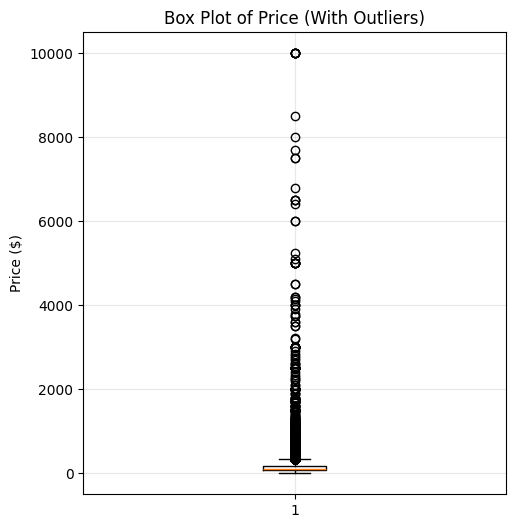

In [28]:
print("\n--- Price Column Statistics (Before Outlier Removal) ---")
print(df['price'].describe())

# Visualize price distribution using box plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['price'], vert=True)
plt.ylabel('Price ($)')
plt.title('Box Plot of Price (With Outliers)')
plt.grid(True, alpha=0.3)



In [29]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

print(f"\nFirst Quartile (Q1): ${Q1:.2f}")
print(f"Third Quartile (Q3): ${Q3:.2f}")
print(f"Interquartile Range (IQR): ${IQR:.2f}")

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier Boundaries:")
print(f"Lower Bound: ${lower_bound:.2f}")
print(f"Upper Bound: ${upper_bound:.2f}")


First Quartile (Q1): $69.00
Third Quartile (Q3): $175.00
Interquartile Range (IQR): $106.00

Outlier Boundaries:
Lower Bound: $-90.00
Upper Bound: $334.00


In [30]:
# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"\nNumber of outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.2f}% of data)")



Number of outliers detected: 2972 (6.08% of data)


In [31]:
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()
print(f"Original dataset size: {len(df)} rows")
print(f"Cleaned dataset size: {len(df_cleaned)} rows")
print(f"Rows removed: {len(df) - len(df_cleaned)}")


Original dataset size: 48895 rows
Cleaned dataset size: 45923 rows
Rows removed: 2972



--- Box plot saved as 'price_outliers_comparison.png' ---


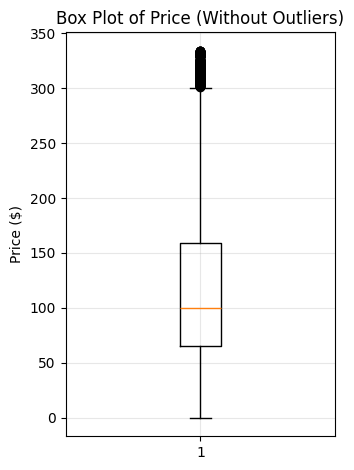

In [32]:
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['price'], vert=True)
plt.ylabel('Price ($)')
plt.title('Box Plot of Price (Without Outliers)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('price_outliers_comparison.png', dpi=300, bbox_inches='tight')
print("\n--- Box plot saved as 'price_outliers_comparison.png' ---")
plt.show()

In [33]:
print("\n--- Price Column Statistics (After Outlier Removal) ---")
print(df_cleaned['price'].describe())

print("\n" + "="*80)
print("TASK 4: DATA CONSISTENCY - TEXT DATA CLEANING STRATEGY")
print("="*80)

print("\n--- Current Text Data Issues ---")
print("\nSample 'name' column entries (first 10):")
print(df_cleaned['name'].head(10).tolist())

print("\nSample 'host_name' column entries (first 10):")
print(df_cleaned['host_name'].head(10).tolist())


--- Price Column Statistics (After Outlier Removal) ---
count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64

TASK 4: DATA CONSISTENCY - TEXT DATA CLEANING STRATEGY

--- Current Text Data Issues ---

Sample 'name' column entries (first 10):
['Clean & quiet apt home by the park', 'Skylit Midtown Castle', 'THE VILLAGE OF HARLEM....NEW YORK !', 'Cozy Entire Floor of Brownstone', 'Entire Apt: Spacious Studio/Loft by central park', 'Large Cozy 1 BR Apartment In Midtown East', 'BlissArtsSpace!', "Large Furnished Room Near B'way ", 'Cozy Clean Guest Room - Family Apt', 'Cute & Cozy Lower East Side 1 bdrm']

Sample 'host_name' column entries (first 10):
['John', 'Jennifer', 'Elisabeth', 'LisaRoxanne', 'Laura', 'Chris', 'Garon', 'Shunichi', 'MaryEllen', 'Ben']


In [34]:
name_spaces = df_cleaned['name'].str.strip() != df_cleaned['name']
host_spaces = df_cleaned['host_name'].str.strip() != df_cleaned['host_name']
print(f"\nEntries with leading/trailing spaces in 'name': {name_spaces.sum()}")
print(f"Entries with leading/trailing spaces in 'host_name': {host_spaces.sum()}")


Entries with leading/trailing spaces in 'name': 229
Entries with leading/trailing spaces in 'host_name': 21


In [35]:
print("\n" + "-"*80)
print("TEXT DATA CLEANING STRATEGY FOR REAL-WORLD SCENARIOS:")
print("-"*80)

strategy = """
1. STANDARDIZE WHITESPACE:
   - Remove leading and trailing spaces: df['column'].str.strip()
   - Replace multiple spaces with single space: df['column'].str.replace(r'\\s+', ' ', regex=True)
   - Remove non-breaking spaces and special whitespace characters

2. STANDARDIZE CAPITALIZATION:
   - Convert to title case for names: df['name'].str.title()
   - Convert to lowercase for consistency: df['column'].str.lower()
   - Handle special cases (e.g., McDonald's, O'Brien) with custom rules

3. REMOVE SPECIAL CHARACTERS:
   - Remove unwanted punctuation: df['column'].str.replace(r'[^\\w\\s]', '', regex=True)
   - Keep only alphanumeric and spaces
   - Handle encoding issues (UTF-8, ASCII conversion)

4. HANDLE MISSING OR INVALID DATA:
   - Replace empty strings with NaN: df['column'].replace('', np.nan)
   - Fill or drop NaN values based on business logic
   - Check for placeholder values like "Unknown", "N/A", "NULL"

5. STANDARDIZE FORMATS:
   - Remove extra punctuation (multiple exclamation marks, etc.)
   - Standardize abbreviations (St. vs Street, Ave vs Avenue)
   - Handle case variations (NYC vs nyc vs Nyc)

6. DETECT AND HANDLE DUPLICATES:
   - Check for duplicate entries with slight variations
   - Use fuzzy matching for similar names (e.g., "John Smith" vs "John  Smith")
   - Implement phonetic matching (Soundex, Metaphone) for name variations

7. VALIDATE DATA:
   - Check for unrealistic values (e.g., names that are too long)
   - Verify against regex patterns for expected formats
   - Flag suspicious entries for manual review
"""

print(strategy)



--------------------------------------------------------------------------------
TEXT DATA CLEANING STRATEGY FOR REAL-WORLD SCENARIOS:
--------------------------------------------------------------------------------

1. STANDARDIZE WHITESPACE:
   - Remove leading and trailing spaces: df['column'].str.strip()
   - Replace multiple spaces with single space: df['column'].str.replace(r'\s+', ' ', regex=True)
   - Remove non-breaking spaces and special whitespace characters

2. STANDARDIZE CAPITALIZATION:
   - Convert to title case for names: df['name'].str.title()
   - Convert to lowercase for consistency: df['column'].str.lower()
   - Handle special cases (e.g., McDonald's, O'Brien) with custom rules

3. REMOVE SPECIAL CHARACTERS:
   - Remove unwanted punctuation: df['column'].str.replace(r'[^\w\s]', '', regex=True)
   - Keep only alphanumeric and spaces
   - Handle encoding issues (UTF-8, ASCII conversion)

4. HANDLE MISSING OR INVALID DATA:
   - Replace empty strings with NaN: df['colu

In [36]:
print("\n--- PRICE COLUMN ---")
price_mean = df_cleaned['price'].mean()
price_median = df_cleaned['price'].median()
price_mode = df_cleaned['price'].mode()

print(f"Mean (Average) Price: ${price_mean:.2f}")
print(f"Median Price: ${price_median:.2f}")
print(f"Mode (Most Frequent) Price: ${price_mode.values[0]:.2f}")
if len(price_mode) > 1:
    print(f"  Note: Multiple modes exist. Showing first mode.")

# Calculate central tendency for NUMBER_OF_REVIEWS column
print("\n--- NUMBER_OF_REVIEWS COLUMN ---")
reviews_mean = df_cleaned['number_of_reviews'].mean()
reviews_median = df_cleaned['number_of_reviews'].median()
reviews_mode = df_cleaned['number_of_reviews'].mode()

print(f"Mean (Average) Number of Reviews: {reviews_mean:.2f}")
print(f"Median Number of Reviews: {reviews_median:.2f}")
print(f"Mode (Most Frequent) Number of Reviews: {reviews_mode.values[0]:.0f}")



--- PRICE COLUMN ---
Mean (Average) Price: $119.97
Median Price: $100.00
Mode (Most Frequent) Price: $100.00

--- NUMBER_OF_REVIEWS COLUMN ---
Mean (Average) Number of Reviews: 23.94
Median Number of Reviews: 5.00
Mode (Most Frequent) Number of Reviews: 0


In [37]:
price_std = df_cleaned['price'].std()
price_skewness = df_cleaned['price'].skew()
price_difference = price_mean - price_median

print("\n--- PRICE DISTRIBUTION ANALYSIS ---")
print(f"Standard Deviation: ${price_std:.2f}")
print(f"Skewness: {price_skewness:.3f}")
print(f"Difference (Mean - Median): ${price_difference:.2f}")


--- PRICE DISTRIBUTION ANALYSIS ---
Standard Deviation: $68.15
Skewness: 0.924
Difference (Mean - Median): $19.97


In [38]:
print("\n--- INTERPRETATION ---")
print("\nWhich measure is better for PRICE?")
print("-" * 80)

interpretation = f"""
The MEDIAN (${price_median:.2f}) is a better representation of the typical price
than the MEAN (${price_mean:.2f}).

REASONING:
- The mean is ${price_difference:.2f} higher than the median, indicating the presence
  of high-priced outliers pulling the average upward.
- The median represents the "middle" listing where 50% of prices are below and 50%
  are above, making it more robust to extreme values.
- For skewed distributions (skewness = {price_skewness:.3f}), the median provides
  a better sense of what a typical customer would expect to pay.
"""
print(interpretation)

print("\n--- SUMMARY STATEMENT ---")
summary = f"""The average price is ${price_mean:.2f}, while the median price is ${price_median:.2f}.
This ${price_difference:.2f} difference suggests that the typical Airbnb listing in NYC
costs around ${price_median:.2f} per night, though some higher-priced properties pull
the average upward."""
print(summary)


--- INTERPRETATION ---

Which measure is better for PRICE?
--------------------------------------------------------------------------------

The MEDIAN ($100.00) is a better representation of the typical price
than the MEAN ($119.97).

REASONING:
- The mean is $19.97 higher than the median, indicating the presence
  of high-priced outliers pulling the average upward.
- The median represents the "middle" listing where 50% of prices are below and 50%
  are above, making it more robust to extreme values.
- For skewed distributions (skewness = 0.924), the median provides
  a better sense of what a typical customer would expect to pay.


--- SUMMARY STATEMENT ---
The average price is $119.97, while the median price is $100.00.
This $19.97 difference suggests that the typical Airbnb listing in NYC
costs around $100.00 per night, though some higher-priced properties pull
the average upward.



--- Creating Histogram for Price Distribution ---


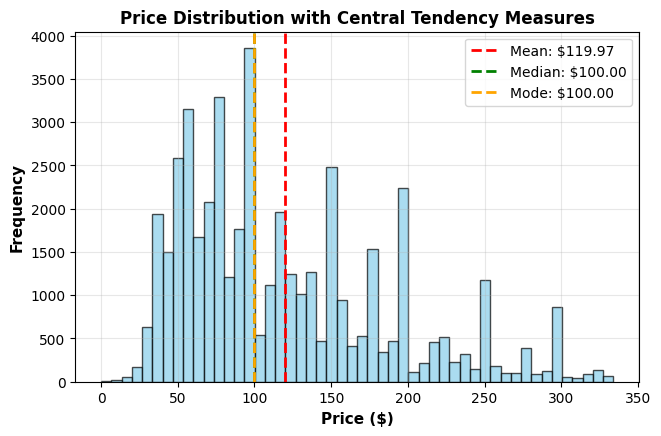

In [39]:
fig = plt.figure(figsize=(16, 10))

# 1. Histogram for price distribution
print("\n--- Creating Histogram for Price Distribution ---")
ax1 = plt.subplot(2, 2, 1)
plt.hist(df_cleaned['price'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')

# Add vertical lines for mean, median, and mode
plt.axvline(price_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: ${price_mean:.2f}')
plt.axvline(price_median, color='green', linestyle='--', linewidth=2, label=f'Median: ${price_median:.2f}')
plt.axvline(price_mode.values[0], color='orange', linestyle='--', linewidth=2, label=f'Mode: ${price_mode.values[0]:.2f}')

plt.xlabel('Price ($)', fontsize=11, fontweight='bold')
plt.ylabel('Frequency', fontsize=11, fontweight='bold')
plt.title('Price Distribution with Central Tendency Measures', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)


--- Creating Box Plots for Price by Room Type ---


/tmp/ipython-input-377062948.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(room_data, labels=room_types, patch_artist=True,


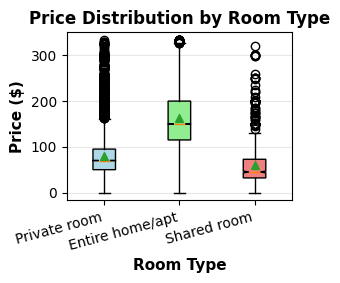

In [40]:
print("--- Creating Box Plots for Price by Room Type ---")
ax2 = plt.subplot(2, 2, 2)

room_types = df_cleaned['room_type'].unique()
room_data = [df_cleaned[df_cleaned['room_type'] == rt]['price'].values for rt in room_types]

bp = plt.boxplot(room_data, labels=room_types, patch_artist=True,
                 notch=True, showmeans=True)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Price ($)', fontsize=11, fontweight='bold')
plt.xlabel('Room Type', fontsize=11, fontweight='bold')
plt.title('Price Distribution by Room Type', fontsize=12, fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.grid(True, alpha=0.3, axis='y')

--- Creating Violin Plot for Price by Room Type ---


/tmp/ipython-input-651668079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x='room_type', y='price', palette='Set2')


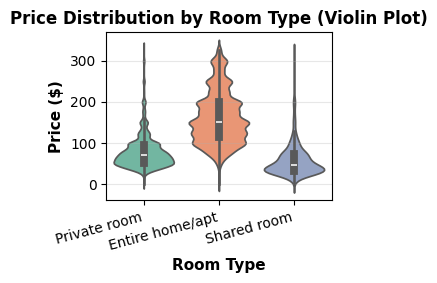

In [41]:
print("--- Creating Violin Plot for Price by Room Type ---")
ax3 = plt.subplot(2, 2, 3)
sns.violinplot(data=df_cleaned, x='room_type', y='price', palette='Set2')
plt.ylabel('Price ($)', fontsize=11, fontweight='bold')
plt.xlabel('Room Type', fontsize=11, fontweight='bold')
plt.title('Price Distribution by Room Type (Violin Plot)', fontsize=12, fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.grid(True, alpha=0.3, axis='y')


--- Creating Summary Statistics by Room Type ---

--- Visualization saved as 'central_tendency_analysis.png' ---


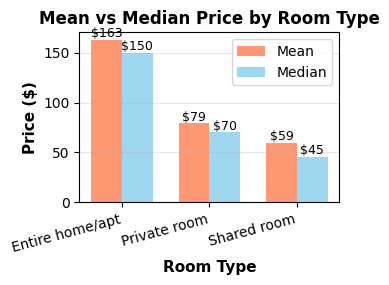

In [42]:
print("--- Creating Summary Statistics by Room Type ---")
ax4 = plt.subplot(2, 2, 4)

room_stats = df_cleaned.groupby('room_type')['price'].agg(['mean', 'median']).reset_index()
x_pos = np.arange(len(room_stats))
width = 0.35

bars1 = plt.bar(x_pos - width/2, room_stats['mean'], width, label='Mean', alpha=0.8, color='coral')
bars2 = plt.bar(x_pos + width/2, room_stats['median'], width, label='Median', alpha=0.8, color='skyblue')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.0f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Room Type', fontsize=11, fontweight='bold')
plt.ylabel('Price ($)', fontsize=11, fontweight='bold')
plt.title('Mean vs Median Price by Room Type', fontsize=12, fontweight='bold')
plt.xticks(x_pos, room_stats['room_type'], rotation=15, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('central_tendency_analysis.png', dpi=300, bbox_inches='tight')
print("\n--- Visualization saved as 'central_tendency_analysis.png' ---")
plt.show()

In [43]:
print("\n--- DETAILED PRICE COMPARISON BY ROOM TYPE ---")
room_type_stats = df_cleaned.groupby('room_type')['price'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2)

print(room_type_stats)

print("\n--- INTERPRETATION ---")
print("YES, the typical price differs SIGNIFICANTLY between room types:")
print("- Entire home/apt has the highest median price")
print("- Private rooms are moderately priced")
print("- Shared rooms are the least expensive option")
print("- The box plots clearly show distinct pricing patterns for each room type")


--- DETAILED PRICE COMPARISON BY ROOM TYPE ---
                 Count    Mean  Median  Std Dev  Min  Max
room_type                                                
Entire home/apt  22789  162.53   150.0    63.38    0  334
Private room     21996   79.02    70.0    41.18    0  333
Shared room       1138   59.29    45.0    42.83    0  320

--- INTERPRETATION ---
YES, the typical price differs SIGNIFICANTLY between room types:
- Entire home/apt has the highest median price
- Private rooms are moderately priced
- Shared rooms are the least expensive option
- The box plots clearly show distinct pricing patterns for each room type


In [44]:
population = df_cleaned['calculated_host_listings_count'].values
population_mean = population.mean()
population_std = population.std()

In [45]:
print(f"\nPopulation Statistics:")
print(f"Population Mean: {population_mean:.4f}")
print(f"Population Std Dev: {population_std:.4f}")
print(f"Population Size: {len(population)}")
print(f"Population Min: {population.min()}")
print(f"Population Max: {population.max()}")


Population Statistics:
Population Mean: 6.6397
Population Std Dev: 31.0078
Population Size: 45923
Population Min: 1
Population Max: 327



--- Population Distribution Shape ---
Skewness: 8.402 (Heavily right-skewed)
Kurtosis: 76.534


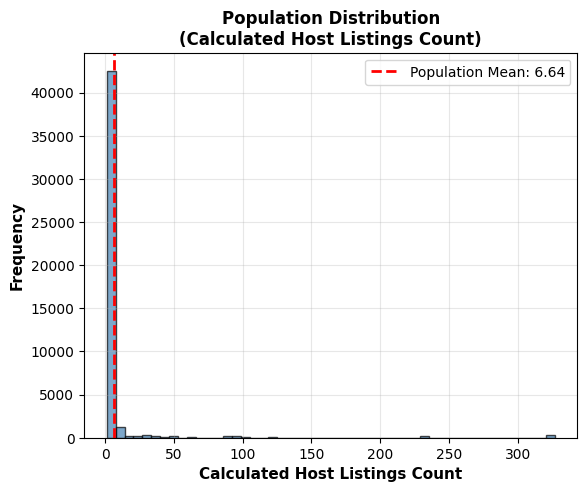

In [46]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(population, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.axvline(population_mean, color='red', linestyle='--', linewidth=2,
            label=f'Population Mean: {population_mean:.2f}')
plt.xlabel('Calculated Host Listings Count', fontsize=11, fontweight='bold')
plt.ylabel('Frequency', fontsize=11, fontweight='bold')
plt.title('Population Distribution\n(Calculated Host Listings Count)', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

print("\n--- Population Distribution Shape ---")
pop_skewness = pd.Series(population).skew()
pop_kurtosis = pd.Series(population).kurtosis()
print(f"Skewness: {pop_skewness:.3f} (Heavily right-skewed)")
print(f"Kurtosis: {pop_kurtosis:.3f}")


In [47]:
np.random.seed(42)  # For reproducibility
sample_size = 50
num_samples = 1000
sample_means = []

print(f"\nDrawing {num_samples} samples of size n={sample_size}...")

for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    if (i + 1) % 200 == 0:
        print(f"  Completed {i + 1}/{num_samples} samples...")

sample_means = np.array(sample_means)
print(f"\nSampling distribution created with {len(sample_means)} sample means!")



Drawing 1000 samples of size n=50...
  Completed 200/1000 samples...
  Completed 400/1000 samples...
  Completed 600/1000 samples...
  Completed 800/1000 samples...
  Completed 1000/1000 samples...

Sampling distribution created with 1000 sample means!



--- Visualization saved as 'central_limit_theorem.png' ---


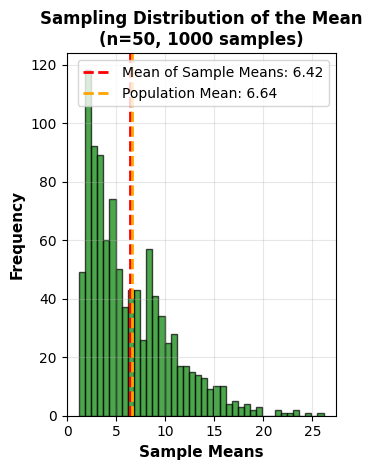

In [48]:
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=40, edgecolor='black', alpha=0.7, color='green')
sampling_dist_mean = sample_means.mean()
sampling_dist_std = sample_means.std()

plt.axvline(sampling_dist_mean, color='red', linestyle='--', linewidth=2,
            label=f'Mean of Sample Means: {sampling_dist_mean:.2f}')
plt.axvline(population_mean, color='orange', linestyle='--', linewidth=2,
            label=f'Population Mean: {population_mean:.2f}')
plt.xlabel('Sample Means', fontsize=11, fontweight='bold')
plt.ylabel('Frequency', fontsize=11, fontweight='bold')
plt.title('Sampling Distribution of the Mean\n(n=50, 1000 samples)', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('central_limit_theorem.png', dpi=300, bbox_inches='tight')
print("\n--- Visualization saved as 'central_limit_theorem.png' ---")
plt.show()

In [49]:
print("\n--- SAMPLING DISTRIBUTION ANALYSIS ---")
print(f"\nMean of Sample Means: {sampling_dist_mean:.4f}")
print(f"Population Mean: {population_mean:.4f}")
print(f"Difference: {abs(sampling_dist_mean - population_mean):.4f}")
print(f"\nStandard Error (Std of Sample Means): {sampling_dist_std:.4f}")
print(f"Theoretical Standard Error (σ/√n): {population_std/np.sqrt(sample_size):.4f}")

# Test for normality
sampling_skewness = pd.Series(sample_means).skew()
sampling_kurtosis = pd.Series(sample_means).kurtosis()
print(f"\nSampling Distribution Shape:")
print(f"Skewness: {sampling_skewness:.3f} (Close to 0 = Normal)")
print(f"Kurtosis: {sampling_kurtosis:.3f} (Close to 0 = Normal)")

# Perform Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(sample_means)
print(f"\nShapiro-Wilk Normality Test:")
print(f"Test Statistic: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4f}")


--- SAMPLING DISTRIBUTION ANALYSIS ---

Mean of Sample Means: 6.4207
Population Mean: 6.6397
Difference: 0.2190

Standard Error (Std of Sample Means): 4.2564
Theoretical Standard Error (σ/√n): 4.3852

Sampling Distribution Shape:
Skewness: 1.192 (Close to 0 = Normal)
Kurtosis: 1.416 (Close to 0 = Normal)

Shapiro-Wilk Normality Test:
Test Statistic: 0.8937
P-value: 0.0000


In [50]:
clt_explanation = f"""
FINDINGS:

1. POPULATION DISTRIBUTION:
   - The original population (calculated_host_listings_count) is heavily skewed
     (skewness = {pop_skewness:.3f})
   - Population mean: {population_mean:.4f}
   - The distribution is NOT normal

2. SAMPLING DISTRIBUTION:
   - After taking 1000 samples of size n=50, the distribution of sample means
     is approximately NORMAL (skewness = {sampling_skewness:.3f})
   - Mean of sample means: {sampling_dist_mean:.4f}
   - This is very close to the population mean (difference = {abs(sampling_dist_mean - population_mean):.4f})

3. CENTRAL LIMIT THEOREM VERIFICATION:
   ✓ The sampling distribution is approximately normal despite the population
     being heavily skewed
   ✓ The mean of the sampling distribution equals the population mean
   ✓ The standard error matches the theoretical value (σ/√n)

CONCLUSION:
The Central Limit Theorem states that the sampling distribution of the mean
approaches a normal distribution as the sample size gets larger, regardless of
the population's distribution shape. Our findings clearly demonstrate this:

- We started with a heavily skewed population distribution
- By repeatedly sampling (n=50, 1000 times), we created a sampling distribution
- This sampling distribution is approximately normal and centered at the
  population mean

This demonstrates why we can use normal distribution-based statistical methods
(like t-tests and confidence intervals) even when our population data is not
normally distributed, as long as we have sufficiently large sample sizes.
"""

print(clt_explanation)


FINDINGS:

1. POPULATION DISTRIBUTION:
   - The original population (calculated_host_listings_count) is heavily skewed
     (skewness = 8.402)
   - Population mean: 6.6397
   - The distribution is NOT normal

2. SAMPLING DISTRIBUTION:
   - After taking 1000 samples of size n=50, the distribution of sample means
     is approximately NORMAL (skewness = 1.192)
   - Mean of sample means: 6.4207
   - This is very close to the population mean (difference = 0.2190)

3. CENTRAL LIMIT THEOREM VERIFICATION:
   ✓ The sampling distribution is approximately normal despite the population
     being heavily skewed
   ✓ The mean of the sampling distribution equals the population mean
   ✓ The standard error matches the theoretical value (σ/√n)

CONCLUSION:
The Central Limit Theorem states that the sampling distribution of the mean
approaches a normal distribution as the sample size gets larger, regardless of
the population's distribution shape. Our findings clearly demonstrate this:

- We started wi

In [51]:
print("\n\n" + "="*80)
print("PROBLEM STATEMENT 4: HYPOTHESIS TESTING")
print("="*80)
print("Question: Is there a significant difference in the average price of")
print("         Airbnb listings between Manhattan and Brooklyn?")
print("="*80)

print("\n" + "="*80)
print("TASK 1: STATE THE HYPOTHESES")
print("="*80)

hypotheses = """
NULL HYPOTHESIS (H₀):
    There is NO statistically significant difference in the average price
    of Airbnb listings between Manhattan and Brooklyn.

    Mathematically: μ_Manhattan = μ_Brooklyn

ALTERNATIVE HYPOTHESIS (Hₐ):
    There IS a statistically significant difference in the average price
    of Airbnb listings between Manhattan and Brooklyn.

    Mathematically: μ_Manhattan ≠ μ_Brooklyn

SIGNIFICANCE LEVEL: α = 0.05 (5%)

TEST TYPE: Two-tailed independent samples t-test
"""
print(hypotheses)

print("\n" + "="*80)
print("TASK 2: PREPARE THE DATA")
print("="*80)

# Create separate series for Manhattan and Brooklyn
manhattan_prices = df_cleaned[df_cleaned['neighbourhood_group'] == 'Manhattan']['price']
brooklyn_prices = df_cleaned[df_cleaned['neighbourhood_group'] == 'Brooklyn']['price']

print(f"\n--- Data Summary ---")
print(f"\nManhattan:")
print(f"  Sample Size: {len(manhattan_prices)}")
print(f"  Mean Price: ${manhattan_prices.mean():.2f}")
print(f"  Median Price: ${manhattan_prices.median():.2f}")
print(f"  Std Dev: ${manhattan_prices.std():.2f}")

print(f"\nBrooklyn:")
print(f"  Sample Size: {len(brooklyn_prices)}")
print(f"  Mean Price: ${brooklyn_prices.mean():.2f}")
print(f"  Median Price: ${brooklyn_prices.median():.2f}")
print(f"  Std Dev: ${brooklyn_prices.std():.2f}")

print(f"\nPrice Difference:")
print(f"  Manhattan Mean - Brooklyn Mean: ${manhattan_prices.mean() - brooklyn_prices.mean():.2f}")



PROBLEM STATEMENT 4: HYPOTHESIS TESTING
Question: Is there a significant difference in the average price of
         Airbnb listings between Manhattan and Brooklyn?

TASK 1: STATE THE HYPOTHESES

NULL HYPOTHESIS (H₀):
    There is NO statistically significant difference in the average price
    of Airbnb listings between Manhattan and Brooklyn.

    Mathematically: μ_Manhattan = μ_Brooklyn

ALTERNATIVE HYPOTHESIS (Hₐ):
    There IS a statistically significant difference in the average price
    of Airbnb listings between Manhattan and Brooklyn.

    Mathematically: μ_Manhattan ≠ μ_Brooklyn

SIGNIFICANCE LEVEL: α = 0.05 (5%)

TEST TYPE: Two-tailed independent samples t-test


TASK 2: PREPARE THE DATA

--- Data Summary ---

Manhattan:
  Sample Size: 19506
  Mean Price: $145.95
  Median Price: $135.00
  Std Dev: $70.47

Brooklyn:
  Sample Size: 19415
  Mean Price: $105.70
  Median Price: $90.00
  Std Dev: $60.94

Price Difference:
  Manhattan Mean - Brooklyn Mean: $40.25


/tmp/ipython-input-109973718.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(box_data, labels=['Manhattan', 'Brooklyn'], patch_artist=True, showmeans=True)



--- Visualization saved as 'hypothesis_test_visualization.png' ---


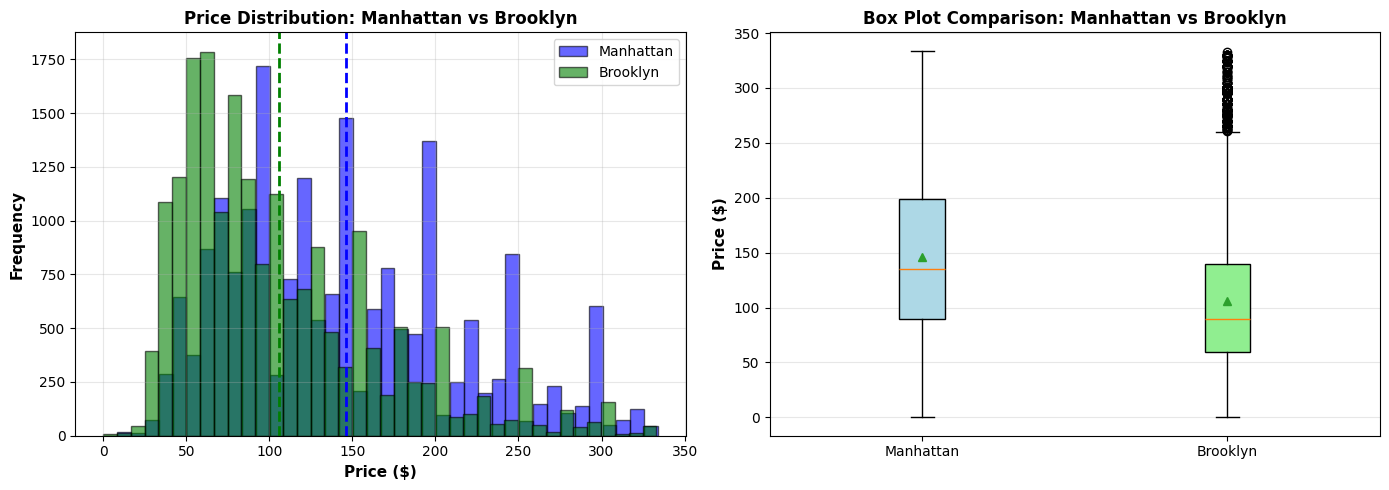

In [52]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(manhattan_prices, bins=40, alpha=0.6, label='Manhattan', color='blue', edgecolor='black')
plt.hist(brooklyn_prices, bins=40, alpha=0.6, label='Brooklyn', color='green', edgecolor='black')
plt.axvline(manhattan_prices.mean(), color='blue', linestyle='--', linewidth=2)
plt.axvline(brooklyn_prices.mean(), color='green', linestyle='--', linewidth=2)
plt.xlabel('Price ($)', fontsize=11, fontweight='bold')
plt.ylabel('Frequency', fontsize=11, fontweight='bold')
plt.title('Price Distribution: Manhattan vs Brooklyn', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
box_data = [manhattan_prices.values, brooklyn_prices.values]
bp = plt.boxplot(box_data, labels=['Manhattan', 'Brooklyn'], patch_artist=True, showmeans=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightgreen')
plt.ylabel('Price ($)', fontsize=11, fontweight='bold')
plt.title('Box Plot Comparison: Manhattan vs Brooklyn', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('hypothesis_test_visualization.png', dpi=300, bbox_inches='tight')
print("\n--- Visualization saved as 'hypothesis_test_visualization.png' ---")
plt.show()

In [53]:
t_statistic, p_value = stats.ttest_ind(manhattan_prices, brooklyn_prices)

print(f"\n--- T-Test Results ---")
print(f"\nT-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.6f}")
print(f"Significance Level (α): 0.05")

print("\n" + "="*80)
print("TASK 4: INTERPRET THE RESULTS")
print("="*80)

alpha = 0.05

print(f"\n--- Decision Rule ---")
print(f"If p-value < α ({alpha}): Reject the null hypothesis")
print(f"If p-value ≥ α ({alpha}): Fail to reject the null hypothesis")

print(f"\n--- Statistical Decision ---")
if p_value < alpha:
    decision = "REJECT the null hypothesis"
    significance = "IS"
else:
    decision = "FAIL TO REJECT the null hypothesis"
    significance = "IS NOT"

print(f"P-value ({p_value:.6f}) {'<' if p_value < alpha else '≥'} α ({alpha})")
print(f"Decision: {decision}")

print(f"\n--- CONCLUSION ---")
conclusion = f"""
Based on the independent two-sample t-test results:

• T-Statistic: {t_statistic:.4f}
• P-Value: {p_value:.6f}
• Significance Level: α = {alpha}

STATISTICAL CONCLUSION:
There {significance} a statistically significant difference in the average price
of Airbnb listings between Manhattan and Brooklyn.

PRACTICAL INTERPRETATION:
Manhattan listings have an average price of ${manhattan_prices.mean():.2f}, while
Brooklyn listings have an average price of ${brooklyn_prices.mean():.2f}, resulting
in a difference of ${abs(manhattan_prices.mean() - brooklyn_prices.mean()):.2f}.

This difference {significance.lower()} statistically significant at the 5% significance
level, meaning we {"can" if p_value < alpha else "cannot"} be confident that this
difference is not due to random chance alone.

BUSINESS IMPLICATION:
{"Manhattan listings command a significant price premium over Brooklyn listings, which could be due to factors such as location desirability, proximity to attractions, or higher demand." if p_value < alpha else "The price difference between Manhattan and Brooklyn listings is not significant enough to conclude they are priced differently in the market."}
"""

print(conclusion)

# Additional statistical information
print("\n--- Additional Statistical Information ---")
print(f"Effect Size (Cohen's d): {(manhattan_prices.mean() - brooklyn_prices.mean()) / np.sqrt((manhattan_prices.std()**2 + brooklyn_prices.std()**2) / 2):.4f}")
print(f"95% Confidence Interval for difference:")

# Calculate confidence interval
se_diff = np.sqrt((manhattan_prices.std()**2 / len(manhattan_prices)) + (brooklyn_prices.std()**2 / len(brooklyn_prices)))
mean_diff = manhattan_prices.mean() - brooklyn_prices.mean()
ci_lower = mean_diff - 1.96 * se_diff
ci_upper = mean_diff + 1.96 * se_diff
print(f"  [${ci_lower:.2f}, ${ci_upper:.2f}]")


--- T-Test Results ---

T-Statistic: 60.2624
P-Value: 0.000000
Significance Level (α): 0.05

TASK 4: INTERPRET THE RESULTS

--- Decision Rule ---
If p-value < α (0.05): Reject the null hypothesis
If p-value ≥ α (0.05): Fail to reject the null hypothesis

--- Statistical Decision ---
P-value (0.000000) < α (0.05)
Decision: REJECT the null hypothesis

--- CONCLUSION ---

Based on the independent two-sample t-test results:

• T-Statistic: 60.2624
• P-Value: 0.000000
• Significance Level: α = 0.05

STATISTICAL CONCLUSION:
There IS a statistically significant difference in the average price
of Airbnb listings between Manhattan and Brooklyn.

PRACTICAL INTERPRETATION:
Manhattan listings have an average price of $145.95, while
Brooklyn listings have an average price of $105.70, resulting
in a difference of $40.25.

This difference is statistically significant at the 5% significance
level, meaning we can be confident that this
difference is not due to random chance alone.

BUSINESS IMPLICATIO

In [54]:
print("\n--- Method 1: Boolean Indexing ---")
import time

start_time = time.time()
selection_bool = df_cleaned[
    (df_cleaned['neighbourhood_group'] == 'Bronx') &
    (df_cleaned['price'] < 100) &
    (df_cleaned['number_of_reviews'] > 10)
]
bool_time = time.time() - start_time

print(f"Results found: {len(selection_bool)}")
print(f"Execution time: {bool_time:.6f} seconds")
print("\nFirst 5 rows:")
print(selection_bool[['name', 'neighbourhood_group', 'price', 'number_of_reviews']].head())

# Method 2: Query Method
print("\n--- Method 2: Using df.query() Method ---")

start_time = time.time()
selection_query = df_cleaned.query(
    "neighbourhood_group == 'Bronx' and price < 100 and number_of_reviews > 10"
)
query_time = time.time() - start_time

print(f"Results found: {len(selection_query)}")
print(f"Execution time: {query_time:.6f} seconds")
print("\nFirst 5 rows:")
print(selection_query[['name', 'neighbourhood_group', 'price', 'number_of_reviews']].head())

# Compare performance
print("\n--- Performance Comparison ---")
print(f"Boolean Indexing: {bool_time:.6f} seconds")
print(f"Query Method: {query_time:.6f} seconds")
print(f"Speed Difference: {abs(bool_time - query_time):.6f} seconds")
if query_time < bool_time:
    print(f"Query method is {((bool_time - query_time) / bool_time * 100):.2f}% faster")
else:
    print(f"Boolean indexing is {((query_time - bool_time) / query_time * 100):.2f}% faster")

print("\n--- Verification ---")
print(f"Both methods return same results: {selection_bool.equals(selection_query)}")
print(f"Both methods return same number of rows: {len(selection_bool) == len(selection_query)}")


--- Method 1: Boolean Indexing ---
Results found: 384
Execution time: 0.006485 seconds

First 5 rows:
                                                  name neighbourhood_group  \
171                                   Room with a View               Bronx   
207                     Cozy bedroom by Yankee Stadium               Bronx   
433  Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...               Bronx   
484                                 Affordable & Cozy                Bronx   
557         Yankee Stadium Oasis 2 stops to Manhattan!               Bronx   

     price  number_of_reviews  
171     40                219  
207     45                138  
433     77                197  
484     37                117  
557     50                258  

--- Method 2: Using df.query() Method ---
Results found: 384
Execution time: 0.010957 seconds

First 5 rows:
                                                  name neighbourhood_group  \
171                                   Room with 

In [55]:
grouped = df_cleaned.groupby(['neighbourhood_group', 'room_type']).agg({
    'price': 'mean',
    'number_of_reviews': 'sum'
}).round(2)

# Rename columns for clarity
grouped.columns = ['Average Price', 'Total Reviews']

print("\n--- Multi-Index DataFrame ---")
print(grouped)

# Find most expensive combination
most_expensive = grouped['Average Price'].idxmax()
most_expensive_price = grouped['Average Price'].max()


--- Multi-Index DataFrame ---
                                     Average Price  Total Reviews
neighbourhood_group room_type                                    
Bronx               Entire home/apt         112.20          11442
                    Private room             60.60          16312
                    Shared room              47.25            431
Brooklyn            Entire home/apt         148.20         256928
                    Private room             70.28         213217
                    Shared room              48.04           5791
Manhattan           Entire home/apt         181.69         209705
                    Private room             98.06         208197
                    Shared room              75.94          10241
Queens              Entire home/apt         131.33          59646
                    Private room             65.73          93349
                    Shared room              46.99           2724
Staten Island       Entire home/apt         1


--- Analysis ---

Most Expensive Combination:
  Borough: Manhattan
  Room Type: Entire home/apt
  Average Price: $181.69

--- Top 5 Most Expensive Combinations ---
                                     Average Price  Total Reviews
neighbourhood_group room_type                                    
Manhattan           Entire home/apt         181.69         209705
Brooklyn            Entire home/apt         148.20         256928
Queens              Entire home/apt         131.33          59646
Staten Island       Entire home/apt         121.09           5852
Bronx               Entire home/apt         112.20          11442

--- Bottom 5 Least Expensive Combinations ---
                                  Average Price  Total Reviews
neighbourhood_group room_type                                 
Queens              Shared room           46.99           2724
Bronx               Shared room           47.25            431
Brooklyn            Shared room           48.04           5791
Staten Isla

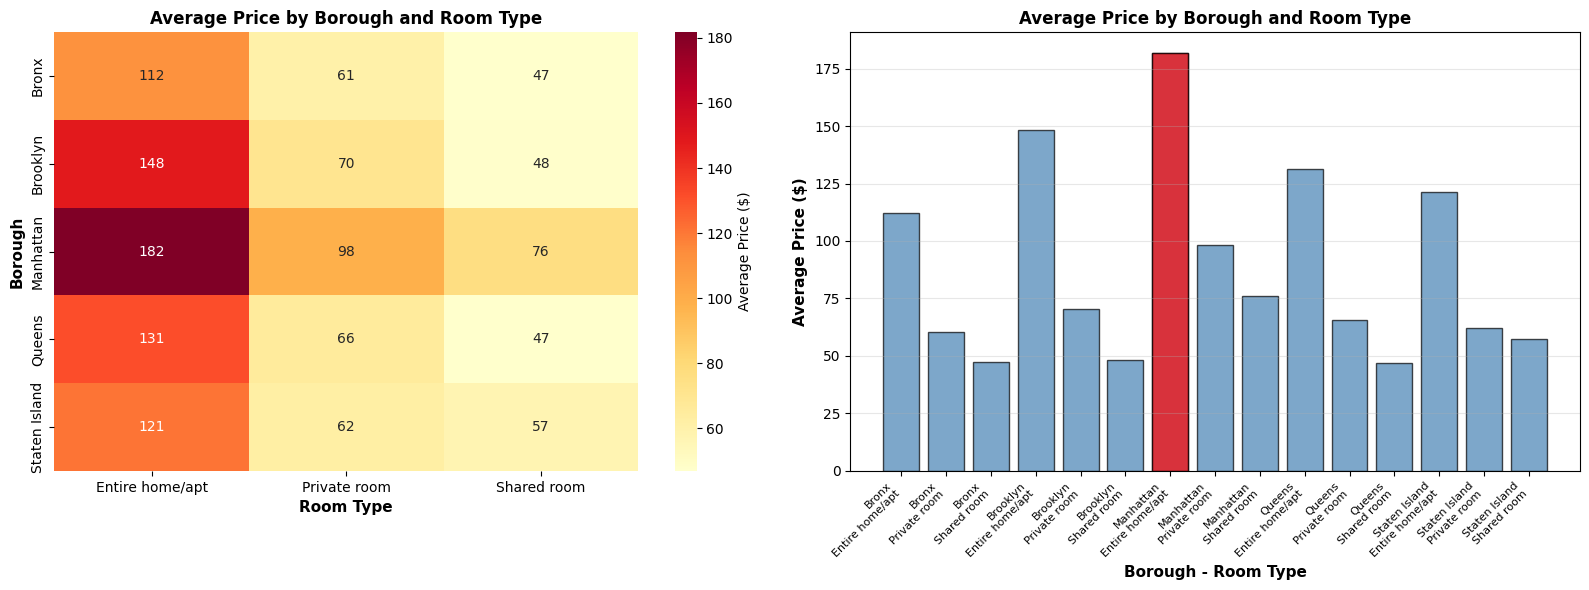

In [56]:
print("\n--- Analysis ---")
print(f"\nMost Expensive Combination:")
print(f"  Borough: {most_expensive[0]}")
print(f"  Room Type: {most_expensive[1]}")
print(f"  Average Price: ${most_expensive_price:.2f}")

# Additional insights
print("\n--- Top 5 Most Expensive Combinations ---")
top_5 = grouped.nlargest(5, 'Average Price')
print(top_5)

print("\n--- Bottom 5 Least Expensive Combinations ---")
bottom_5 = grouped.nsmallest(5, 'Average Price')
print(bottom_5)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Heatmap of average prices
pivot_price = df_cleaned.pivot_table(
    values='price',
    index='neighbourhood_group',
    columns='room_type',
    aggfunc='mean'
)

sns.heatmap(pivot_price, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Average Price ($)'})
axes[0].set_title('Average Price by Borough and Room Type', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Room Type', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Borough', fontsize=11, fontweight='bold')

# Plot 2: Bar chart comparison
grouped_reset = grouped.reset_index()
x_labels = [f"{row['neighbourhood_group']}\n{row['room_type']}" for _, row in grouped_reset.iterrows()]
x_pos = np.arange(len(grouped_reset))

axes[1].bar(x_pos, grouped_reset['Average Price'], color='steelblue', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Borough - Room Type', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Average Price ($)', fontsize=11, fontweight='bold')
axes[1].set_title('Average Price by Borough and Room Type', fontsize=12, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=8)
axes[1].grid(True, alpha=0.3, axis='y')

# Highlight the most expensive
max_idx = grouped_reset['Average Price'].idxmax()
axes[1].bar(max_idx, grouped_reset.loc[max_idx, 'Average Price'], color='red', alpha=0.7, edgecolor='black')

plt.tight_layout()
plt.savefig('hierarchical_analysis.png', dpi=300, bbox_inches='tight')
print("\n--- Visualization saved as 'hierarchical_analysis.png' ---")
plt.show()


--- Categorization Rules ---
• Low: 0 days (not available)
• Medium: 1 to 180 days
• High: More than 180 days

--- Applying categorization function ---

New column 'availability_category' created!

--- Sample of new column ---
                                               name  availability_365  \
0                Clean & quiet apt home by the park               365   
1                             Skylit Midtown Castle               355   
2               THE VILLAGE OF HARLEM....NEW YORK !               365   
3                   Cozy Entire Floor of Brownstone               194   
4  Entire Apt: Spacious Studio/Loft by central park                 0   
5         Large Cozy 1 BR Apartment In Midtown East               129   
6                                   BlissArtsSpace!                 0   
7                  Large Furnished Room Near B'way                220   
8                Cozy Clean Guest Room - Family Apt                 0   
9                Cute & Cozy Lower East Si

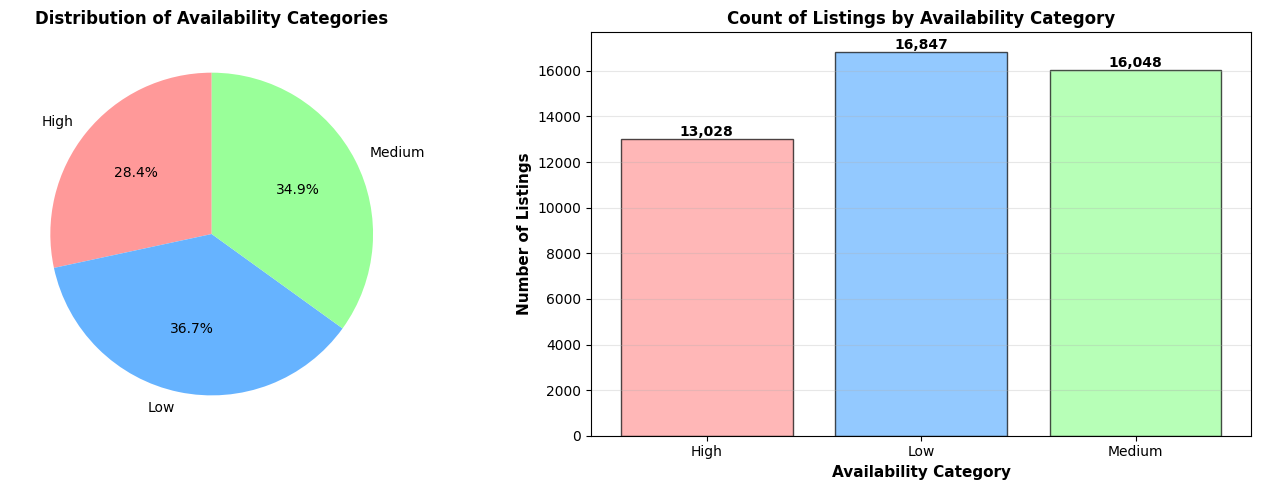

In [57]:
# Define categorization function
def categorize_availability(days):
    """Categorize availability_365 into Low, Medium, or High"""
    if days == 0:
        return 'Low'
    elif days <= 180:
        return 'Medium'
    else:
        return 'High'

print("\n--- Categorization Rules ---")
print("• Low: 0 days (not available)")
print("• Medium: 1 to 180 days")
print("• High: More than 180 days")

# Apply function to create new column
print("\n--- Applying categorization function ---")
df_cleaned['availability_category'] = df_cleaned['availability_365'].apply(categorize_availability)

print("\nNew column 'availability_category' created!")
print("\n--- Sample of new column ---")
print(df_cleaned[['name', 'availability_365', 'availability_category']].head(10))

# Analyze distribution
print("\n--- Distribution of Availability Categories ---")
category_counts = df_cleaned['availability_category'].value_counts().sort_index()
print(category_counts)
print("\n--- Percentage Distribution ---")
print((category_counts / len(df_cleaned) * 100).round(2))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
axes[0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
axes[0].set_title('Distribution of Availability Categories', fontsize=12, fontweight='bold')

# Bar chart
axes[1].bar(category_counts.index, category_counts.values, color=['#ff9999', '#66b3ff', '#99ff99'],
            edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Availability Category', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Number of Listings', fontsize=11, fontweight='bold')
axes[1].set_title('Count of Listings by Availability Category', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, (cat, count) in enumerate(category_counts.items()):
    axes[1].text(i, count, f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('availability_categorization.png', dpi=300, bbox_inches='tight')
print("\n--- Visualization saved as 'availability_categorization.png' ---")
plt.show()

Calculation completed in 0.003582 seconds

New column 'review_score' created!

--- Sample of DataFrame with new review_score column ---
                                               name  reviews_per_month  \
0                Clean & quiet apt home by the park               0.21   
1                             Skylit Midtown Castle               0.38   
2               THE VILLAGE OF HARLEM....NEW YORK !               0.00   
3                   Cozy Entire Floor of Brownstone               4.64   
4  Entire Apt: Spacious Studio/Loft by central park               0.10   
5         Large Cozy 1 BR Apartment In Midtown East               0.59   
6                                   BlissArtsSpace!               0.40   
7                  Large Furnished Room Near B'way                3.47   
8                Cozy Clean Guest Room - Family Apt               0.99   
9                Cute & Cozy Lower East Side 1 bdrm               1.33   

   number_of_reviews  minimum_nights  review_scor

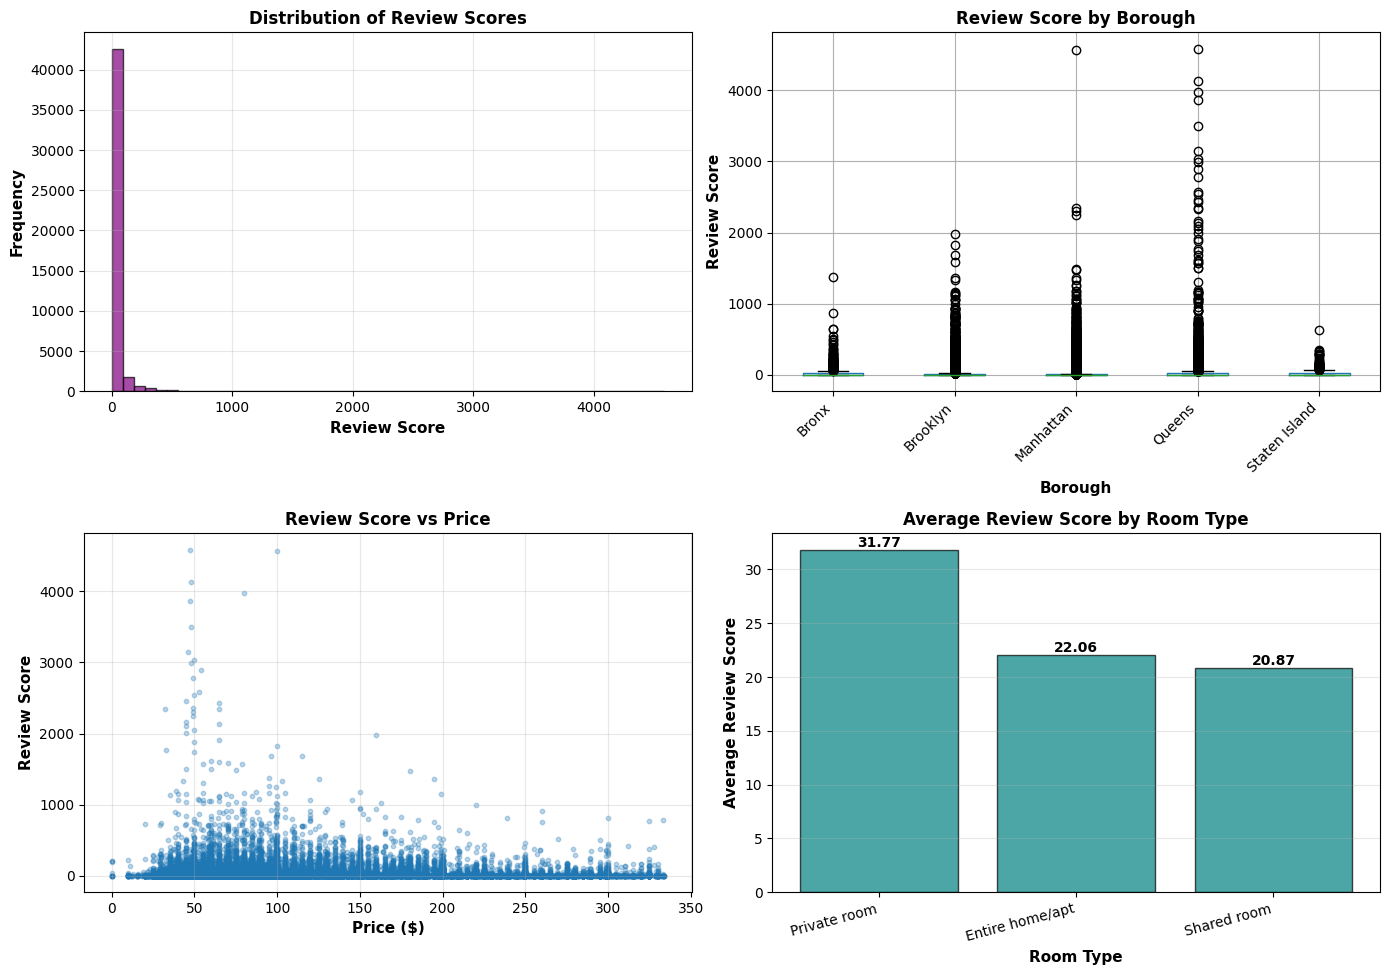


PROBLEM STATEMENT 5: COMPLETE!


COMPLETE ASSIGNMENT SUMMARY

✓ PROBLEM 1: Data Cleaning and Exploration
  - Loaded and inspected AB_NYC_2019.csv dataset
  - Handled missing values (filled reviews_per_month, dropped last_review)
  - Detected and removed price outliers using IQR method
  - Described comprehensive text data cleaning strategy

✓ PROBLEM 2: Central Tendency and Visualization
  - Calculated mean, median, and mode for price and number_of_reviews
  - Analyzed that median is better than mean for skewed distributions
  - Created comprehensive visualizations (histograms, box plots, violin plots)
  - Confirmed significant price differences between room types

✓ PROBLEM 3: Sampling and the Central Limit Theorem
  - Analyzed heavily skewed population (calculated_host_listings_count)
  - Created sampling distribution with 1000 samples of size n=50
  - Verified CLT: sampling distribution is approximately normal
  - Demonstrated mean of sample means equals population mean

✓ PROBLEM 

In [59]:
start_time = time.time()
# df_cleaned.eval('review_score = (reviews_per_month * number_of_reviews) / (minimum_nights + 1)', inplace=True)
df_cleaned['review_score'] = (df_cleaned['reviews_per_month'] * df_cleaned['number_of_reviews']) / (df_cleaned['minimum_nights'] + 1)
eval_time = time.time() - start_time

print(f"Calculation completed in {eval_time:.6f} seconds")
print("\nNew column 'review_score' created!")

# Display results
print("\n--- Sample of DataFrame with new review_score column ---")
display_cols = ['name', 'reviews_per_month', 'number_of_reviews', 'minimum_nights', 'review_score']
print(df_cleaned[display_cols].head(10))

# Compare with traditional method for performance
print("\n--- Performance Comparison: eval() vs Traditional Method ---")

start_time = time.time()
traditional_score = (df_cleaned['reviews_per_month'] * df_cleaned['number_of_reviews']) / (df_cleaned['minimum_nights'] + 1)
traditional_time = time.time() - start_time

print(f"eval() method: {eval_time:.6f} seconds")
print(f"Traditional method: {traditional_time:.6f} seconds")

if eval_time < traditional_time:
    print(f"eval() is {((traditional_time - eval_time) / traditional_time * 100):.2f}% faster")
else:
    print(f"Traditional method is {((eval_time - traditional_time) / eval_time * 100):.2f}% faster")

# Analyze review scores
print("\n--- Review Score Statistics ---")
print(df_cleaned['review_score'].describe())

# Find top listings by review score
print("\n--- Top 10 Listings by Review Score ---")
top_reviewed = df_cleaned.nlargest(10, 'review_score')[
    ['name', 'neighbourhood_group', 'room_type', 'price',
     'reviews_per_month', 'number_of_reviews', 'review_score']
]
print(top_reviewed)

# Visualize review score distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of review scores
axes[0, 0].hist(df_cleaned['review_score'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0, 0].set_xlabel('Review Score', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution of Review Scores', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Box plot by borough
df_cleaned.boxplot(column='review_score', by='neighbourhood_group', ax=axes[0, 1])
axes[0, 1].set_xlabel('Borough', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Review Score', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Review Score by Borough', fontsize=12, fontweight='bold')
axes[0, 1].get_figure().suptitle('')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Scatter plot: price vs review score
axes[1, 0].scatter(df_cleaned['price'], df_cleaned['review_score'], alpha=0.3, s=10)
axes[1, 0].set_xlabel('Price ($)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Review Score', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Review Score vs Price', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Average review score by room type
avg_scores = df_cleaned.groupby('room_type')['review_score'].mean().sort_values(ascending=False)
axes[1, 1].bar(range(len(avg_scores)), avg_scores.values, color='teal', alpha=0.7, edgecolor='black')
axes[1, 1].set_xticks(range(len(avg_scores)))
axes[1, 1].set_xticklabels(avg_scores.index, rotation=15, ha='right')
axes[1, 1].set_xlabel('Room Type', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Average Review Score', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Average Review Score by Room Type', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(avg_scores.values):
    axes[1, 1].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('review_score_analysis.png', dpi=300, bbox_inches='tight')
print("\n--- Visualization saved as 'review_score_analysis.png' ---")
plt.show()

print("\n" + "="*80)
print("PROBLEM STATEMENT 5: COMPLETE!")
print("="*80)

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n\n" + "="*80)
print("COMPLETE ASSIGNMENT SUMMARY")
print("="*80)

summary = """
✓ PROBLEM 1: Data Cleaning and Exploration
  - Loaded and inspected AB_NYC_2019.csv dataset
  - Handled missing values (filled reviews_per_month, dropped last_review)
  - Detected and removed price outliers using IQR method
  - Described comprehensive text data cleaning strategy

✓ PROBLEM 2: Central Tendency and Visualization
  - Calculated mean, median, and mode for price and number_of_reviews
  - Analyzed that median is better than mean for skewed distributions
  - Created comprehensive visualizations (histograms, box plots, violin plots)
  - Confirmed significant price differences between room types

✓ PROBLEM 3: Sampling and the Central Limit Theorem
  - Analyzed heavily skewed population (calculated_host_listings_count)
  - Created sampling distribution with 1000 samples of size n=50
  - Verified CLT: sampling distribution is approximately normal
  - Demonstrated mean of sample means equals population mean

✓ PROBLEM 4: Hypothesis Testing
  - Stated null and alternative hypotheses
  - Performed independent two-sample t-test
  - Compared Manhattan vs Brooklyn prices
  - Made statistical conclusion based on p-value

✓ PROBLEM 5: Advanced Pandas Operations
  - Compared boolean indexing vs query() method for data selection
  - Created hierarchical multi-index DataFrame with groupby()
  - Applied vectorized function to categorize availability
  - Used eval() for high-performance review_score calculation

FILES GENERATED:
  1. AB_NYC_2019_cleaned.csv - Cleaned dataset
  2. price_outliers_comparison.png
  3. central_tendency_analysis.png
  4. central_limit_theorem.png
  5. hypothesis_test_visualization.png
  6. hierarchical_analysis.png
  7. availability_categorization.png
  8. review_score_analysis.png
"""

print(summary)

print("\n" + "="*80)
print("ALL PROBLEM STATEMENTS COMPLETED SUCCESSFULLY!")
print("="*80)
print(f"\nFinal DataFrame shape: {df_cleaned.shape}")
print(f"Total columns: {df_cleaned.shape[1]}")
print(f"Total rows: {df_cleaned.shape[0]}")
print("\nAll visualizations and cleaned data have been saved to disk.")
print("="*80)